# Machine Learning and Public Policy:   Diagnostic

### March 29th, 2017

J. Adrian Sanchez Castro

# Problem 1: Data Acquisition and Analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

import plotly
import plotly.graph_objs as py
plotly.offline.init_notebook_mode()

import glob
import os
import gmaps

import calmap
import warnings
warnings.simplefilter('ignore')

## Datafiles download in bach manually and added in a directory: data
### Checkout data files

In [2]:
!cd data && pwd && ls -1

/Users/schzcas/Documents/github/machine-learning-public-policy/diagnostic/data
graffiti.csv
pothole.csv
sanitation.csv
vacant.csv


### Pandas data frame importation

In [3]:
graffiti = pd.read_csv('/Users/schzcas/Documents/github/machine-learning-public-policy/diagnostic/data/graffiti.csv')
pothole = pd.read_csv('/Users/schzcas/Documents/github/machine-learning-public-policy/diagnostic/data/pothole.csv')
sanitation = pd.read_csv('/Users/schzcas/Documents/github/machine-learning-public-policy/diagnostic/data/sanitation.csv')
vacant = pd.read_csv('/Users/schzcas/Documents/github/machine-learning-public-policy/diagnostic/data/vacant.csv')

# GRAFFITI dataset

## Checkout very quickly columns and data before importation

In [4]:
!cd data && head -n 2 graffiti.csv

Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,What Type of Surface is the Graffiti on?,Where is the Graffiti located?,Street Address,ZIP Code,X Coordinate,Y Coordinate,Ward,Police District,Community Area,SSA,Latitude,Longitude,Location
03/30/2016,Completed,03/30/2016,16-02134145,Graffiti Removal,Glass,Front,531 N CLARK ST,60654,1175441.77867511,1903914.93022029,42,18,8,,41.89170969838417,-87.63098218718851,"(41.89170969838417, -87.63098218718851)"


## Shape of the dataframe

In [5]:
graffiti.shape

(117036, 18)

## Let's throw out na's

In [6]:
graffiti = graffiti.dropna(subset =['Latitude'])

In [7]:
graffiti = graffiti.dropna(subset=['Longitude'])

In [8]:
graffiti.shape

(116961, 18)

## Checkout types of columns

In [9]:
graffiti.dtypes

Creation Date                                object
Status                                       object
Completion Date                              object
Service Request Number                       object
Type of Service Request                      object
What Type of Surface is the Graffiti on?     object
Where is the Graffiti located?               object
Street Address                               object
ZIP Code                                    float64
X Coordinate                                float64
Y Coordinate                                float64
Ward                                        float64
Police District                             float64
Community Area                              float64
SSA                                         float64
Latitude                                    float64
Longitude                                   float64
Location                                     object
dtype: object

## Let's create a new column of Location of type Tuple, we will need shortly

In [10]:
graffiti['location-tuple'] = list(zip(graffiti.Latitude, graffiti.Longitude))

## Change  values and type of columns

In [11]:
float64= graffiti.dtypes[graffiti.dtypes == "float64"].index
for i in float64:
    graffiti[i] = graffiti[i].astype(str)

new_zip = np.array([zipcode[0:5] for zipcode in graffiti['ZIP Code']])
graffiti['ZIP Code'] = new_zip

object_type= graffiti.dtypes[graffiti.dtypes == "object"].index
for i in object_type:
    graffiti[i] = graffiti[i].astype("category")    
    
graffiti.dtypes

Creation Date                               category
Status                                      category
Completion Date                             category
Service Request Number                      category
Type of Service Request                     category
What Type of Surface is the Graffiti on?    category
Where is the Graffiti located?              category
Street Address                              category
ZIP Code                                    category
X Coordinate                                category
Y Coordinate                                category
Ward                                        category
Police District                             category
Community Area                              category
SSA                                         category
Latitude                                    category
Longitude                                   category
Location                                    category
location-tuple                              ca

## Check head and tail of dataframe

Let's look at the "Creation date" column to see the time of our data: 1 year

In [12]:
graffiti.head(1)

Creation Date     Status Completion Date Service Request Number  \
0    03/30/2016  Completed      03/30/2016            16-02134145   

  Type of Service Request What Type of Surface is the Graffiti on?  \
0        Graffiti Removal                                    Glass   

  Where is the Graffiti located?  Street Address ZIP Code   X Coordinate  \
0                          Front  531 N CLARK ST    60654  1175441.77868   

    Y Coordinate  Ward Police District Community Area  SSA       Latitude  \
0  1903914.93022  42.0            18.0            8.0  nan  41.8917096984   

        Longitude                                 Location  \
0  -87.6309821872  (41.89170969838417, -87.63098218718851)   

                    location-tuple  
0  (41.8917096984, -87.6309821872)

In [13]:
graffiti.tail(1)

Creation Date     Status Completion Date Service Request Number  \
117035    03/28/2017  Completed      03/28/2017            17-01734488   

       Type of Service Request What Type of Surface is the Graffiti on?  \
117035        Graffiti Removal                          Brick - Painted   

       Where is the Graffiti located?       Street Address ZIP Code  \
117035                          Front  5738 N WINTHROP AVE    60660   

         X Coordinate  Y Coordinate  Ward Police District Community Area  \
117035  1167828.63953  1938278.7743  48.0            20.0           77.0   

         SSA       Latitude       Longitude  \
117035  26.0  41.9866474265  -87.6582573976   

                                       Location  \
117035  (41.98664742652018, -87.65825739764902)   

                         location-tuple  
117035  (41.9866474265, -87.6582573976)

## Let's delete columns we are not going to use in this EDA

In [14]:
columns_to_erase = ['Service Request Number','X Coordinate', 'Y Coordinate','Ward','Police District','Community Area','SSA','Latitude','Longitude','Location']

for i in columns_to_erase:
    del graffiti[i]  # delete columns

graffiti.head(1)

Creation Date     Status Completion Date Type of Service Request  \
0    03/30/2016  Completed      03/30/2016        Graffiti Removal   

  What Type of Surface is the Graffiti on? Where is the Graffiti located?  \
0                                    Glass                          Front   

   Street Address ZIP Code                   location-tuple  
0  531 N CLARK ST    60654  (41.8917096984, -87.6309821872)

## Let's have a look at a quick description of categorical variables


In [15]:
categorical = graffiti.dtypes[graffiti.dtypes == "category"].index
graffiti[categorical].describe()

Creation Date     Status Completion Date Type of Service Request  \
count         116961     116961          116807                  116961   
unique           364          4             254                       1   
top       04/13/2016  Completed      05/20/2016        Graffiti Removal   
freq             717     112357             740                  116961   

       What Type of Surface is the Graffiti on?  \
count                                    116634   
unique                                       17   
top                             Metal - Painted   
freq                                      37132   

       Where is the Graffiti located?     Street Address ZIP Code  \
count                          116664             116961   116961   
unique                             20              70303       61   
top                             Front  5000 N ELSTON AVE    60632   
freq                            35362                 65    13058   

                         location-tuple  
count                            116961  
unique                            69226  
top     (41.9740334334, -87.7060425087)  
freq                                116

## We can see some unique values for some columns

In [16]:
graffiti['What Type of Surface is the Graffiti on?'].unique()

[Glass, Wood - Unpainted, Brick - Unpainted, Brick - Painted, Wood - Painted, ..., Aluminum Siding, Limestone, Other/Unknown Surface, Asphalt, Tree]
Length: 18
Categories (17, object): [Glass, Wood - Unpainted, Brick - Unpainted, Brick - Painted, ..., Limestone, Other/Unknown Surface, Asphalt, Tree]

In [17]:
graffiti['Where is the Graffiti located?'].unique()

[Front, Side, Fence, Garage, Pole, ..., Dumpster, Express Way Job, Overpass, Hydrant, Phone]
Length: 21
Categories (20, object): [Front, Side, Fence, Garage, ..., Express Way Job, Overpass, Hydrant, Phone]

## Let's see where are zipcodes that most of our Graffiti Calls are from

In [18]:
histo_graffiti = graffiti['ZIP Code'].value_counts()
histo_graffiti.iloc[:10]

60632    13058
60618    10103
60647     9928
60608     8362
60629     7080
60625     6343
60622     6260
60609     4591
60623     4567
60639     4181
Name: ZIP Code, dtype: int64

## Plot this distribution

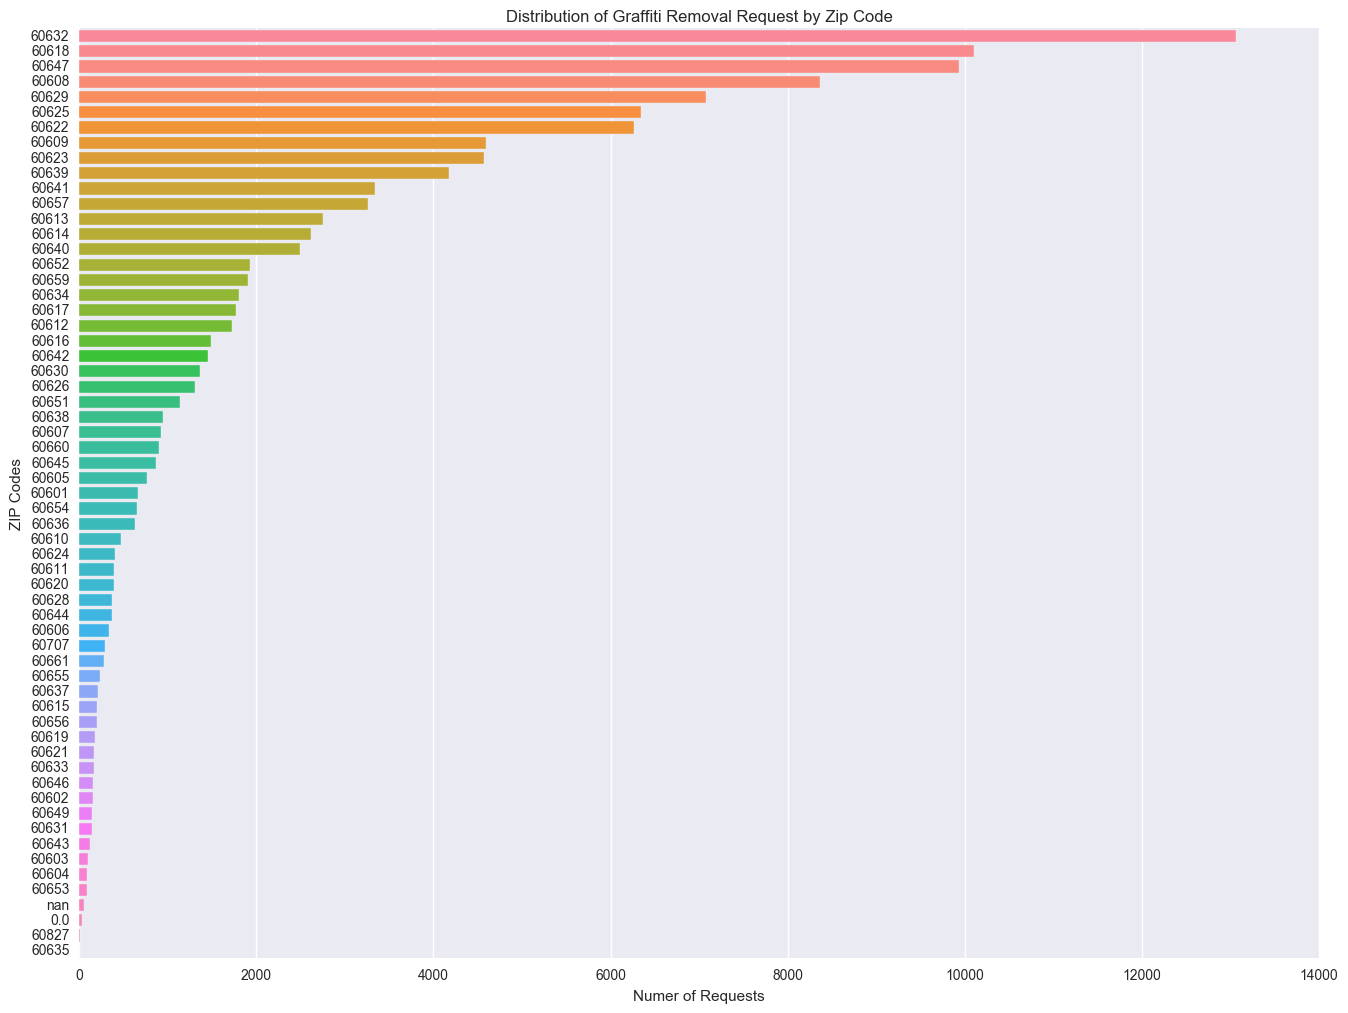

In [19]:
plt.figure(figsize=(16, 12))
g = sns.countplot(y='ZIP Code', saturation= 1, data=graffiti, order=histo_graffiti.index)
plt.title('Distribution of Graffiti Removal Request by Zip Code')
plt.xlabel('Numer of Requests')
plt.ylabel('ZIP Codes')

## What if we could see this in a google maps?

## Heatmap of the Graffiti removal request

In [20]:
gmaps.configure(api_key=os.environ["GOOGLE_API_KEY"])

In [21]:
ubicacion_graffiti = list(graffiti['location-tuple'])
ubicacion_graffiti[0]

(41.891709698384169, -87.630982187188508)

In [22]:
m = gmaps.Map()
m.add_layer(gmaps.heatmap_layer(ubicacion_graffiti))
m

## What type of location do the "bad guys" makes graffitis?

In [24]:
histo_place = graffiti['Where is the Graffiti located?'].value_counts()
histo_place.iloc[:10]

Front                  35362
Side                   16778
Pole                   11135
Garage                  9894
Rear                    7638
Alley                   5912
Traffic Control Box     5292
Sign                    4628
Door                    4004
Dumpster                3766
Name: Where is the Graffiti located?, dtype: int64

## People that make graffiti want to be looked...! Go on the front

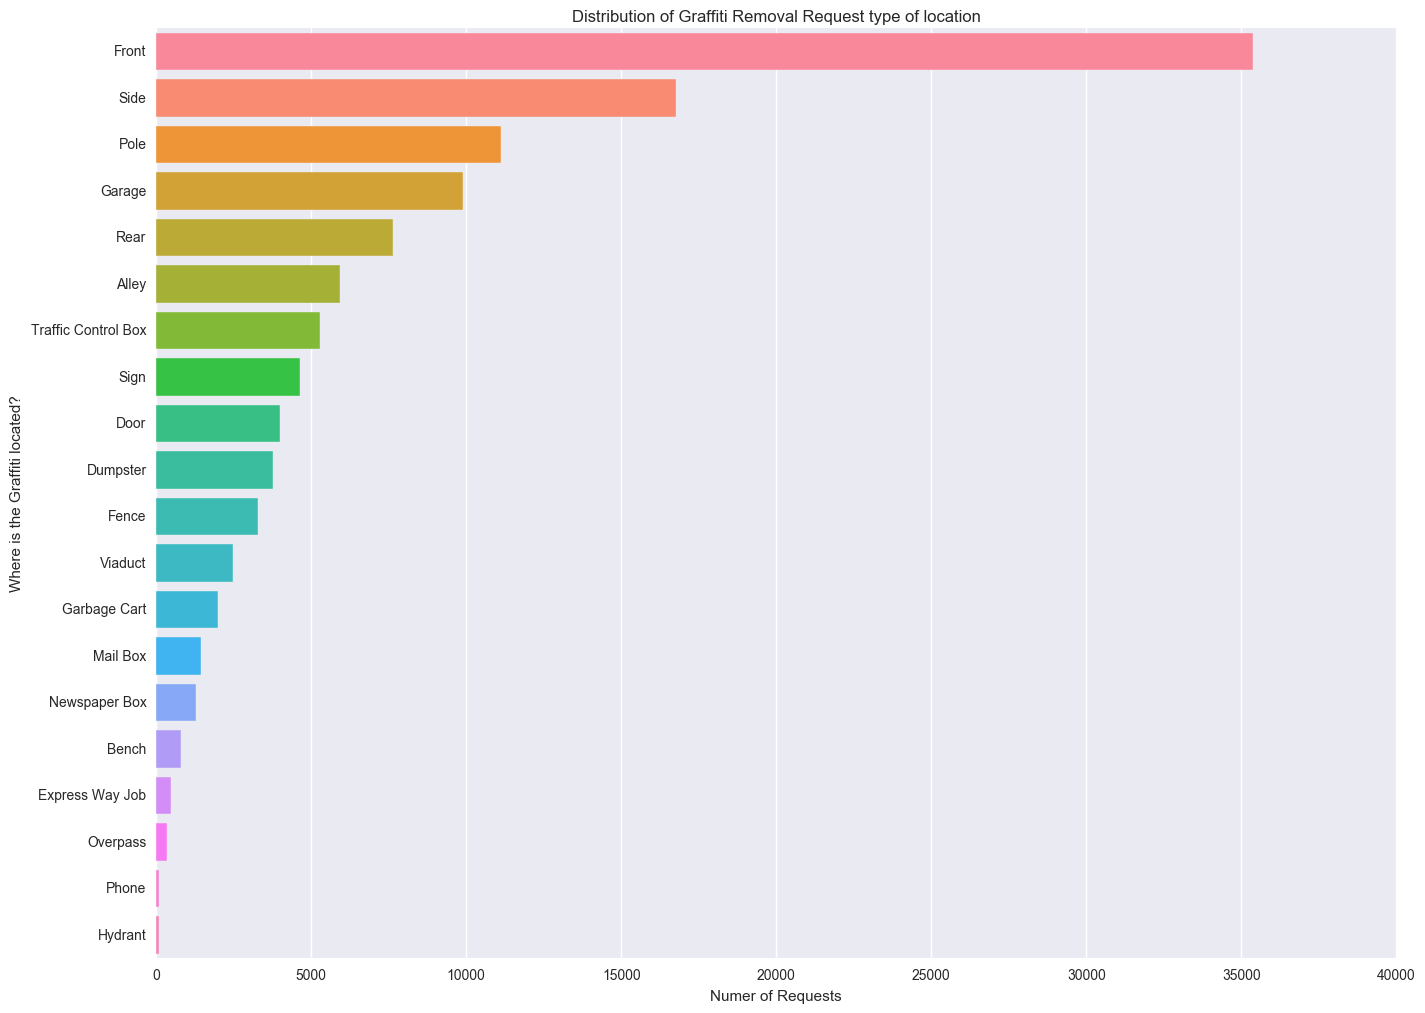

In [27]:
plt.figure(figsize=(16, 12))
g = sns.countplot(y='Where is the Graffiti located?', saturation= 1, data=graffiti, order=histo_place.index)
plt.title('Distribution of Graffiti Removal Request type of location')
plt.xlabel('Numer of Requests')

## In What type of surface?

In [28]:
histo_type = graffiti['What Type of Surface is the Graffiti on?'].value_counts()
histo_type.iloc[:10]

Metal - Painted                         37132
Brick - Unpainted                       21666
Brick - Painted                         19003
Cement (Sidewalk, Alley, Wall, Curb)     8729
Wood - Painted                           6693
Metal - Unpainted                        6334
Aluminum Siding                          5259
Glass                                    2665
Other/Unknown Surface                    2283
Vinyl Siding                             2056
Name: What Type of Surface is the Graffiti on?, dtype: int64

### Metal?... Metal fences? 

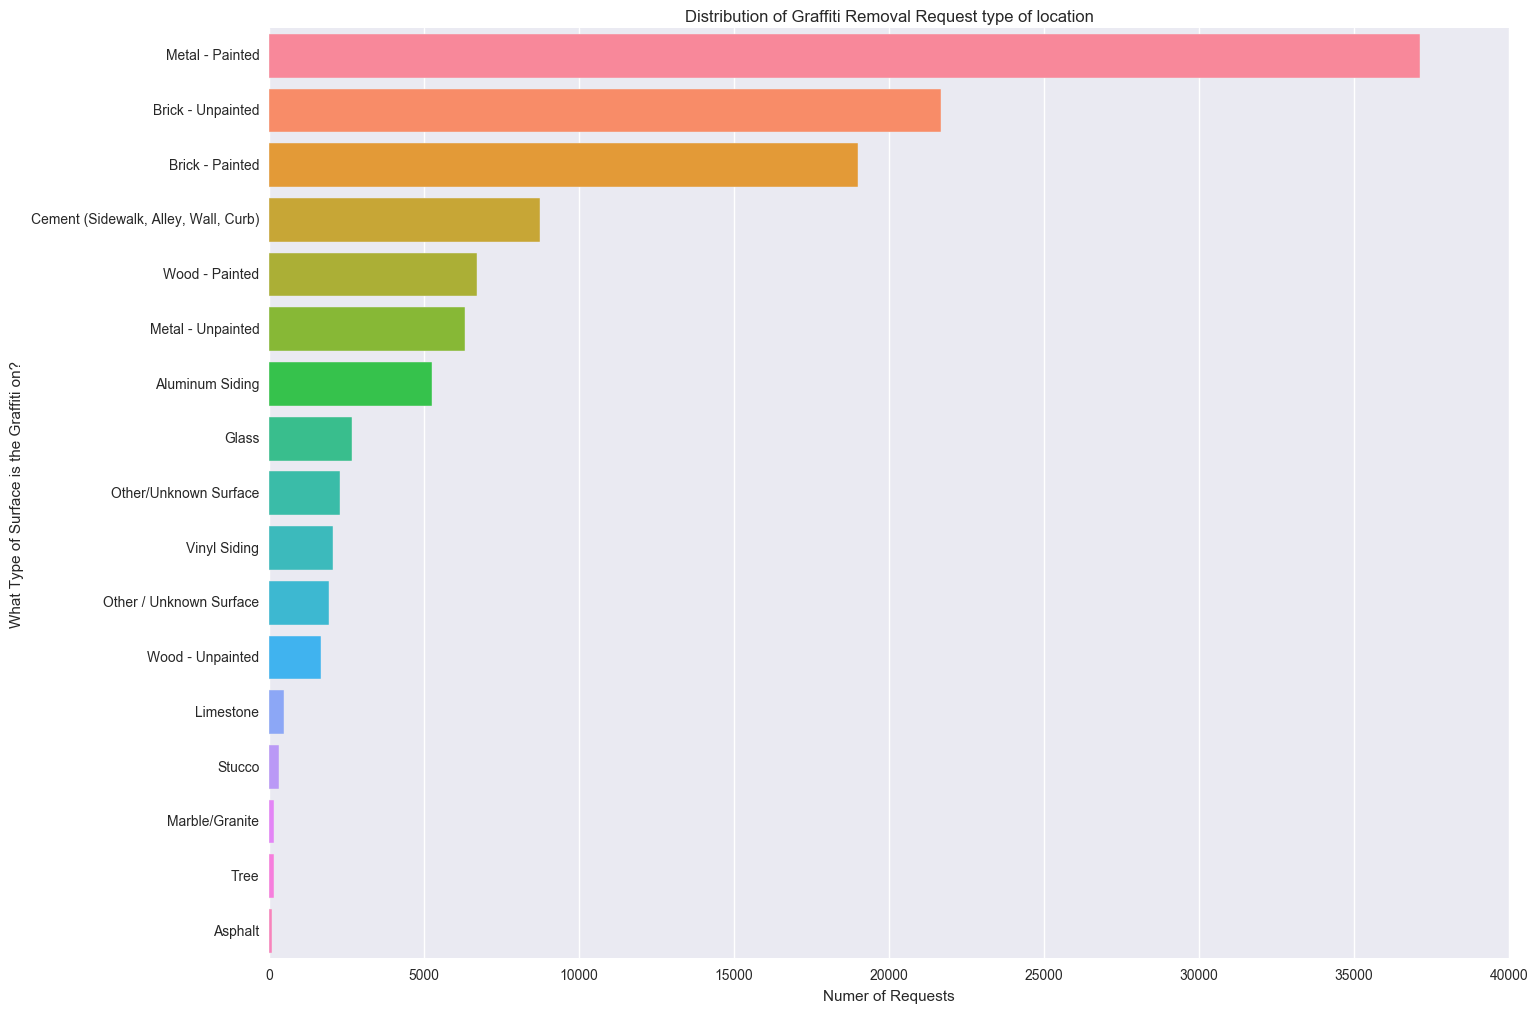

In [30]:
plt.figure(figsize=(16, 12))
g = sns.countplot(y='What Type of Surface is the Graffiti on?', saturation= 1, data=graffiti, order=histo_type.index)
plt.title('Distribution of Graffiti Removal Request type of location')
plt.xlabel('Numer of Requests')

## Analysis over Time

### How much time does it take to complete the request?

In [31]:
datetime_creation = graffiti['Creation Date']
datetime_completion = graffiti['Completion Date']

In [32]:
graffiti['Creation Date'] = pd.to_datetime(datetime_creation)
graffiti['Completion Date'] = pd.to_datetime(datetime_completion)

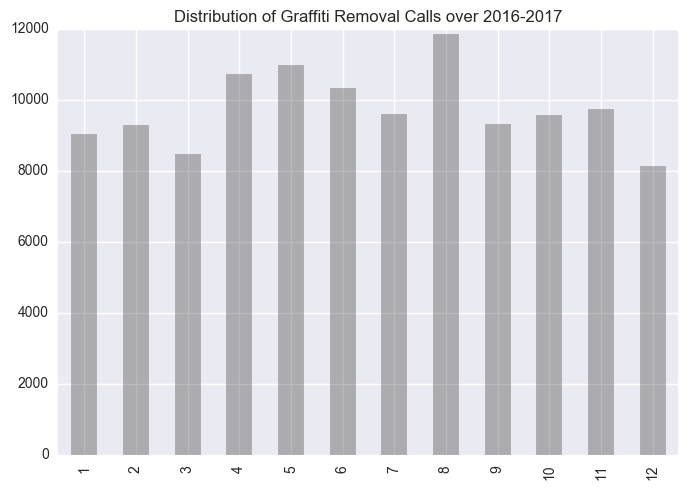

In [33]:
graffiti['Creation Date'].dt.month.value_counts(sort=False).plot.bar(color='k', alpha=0.3)
plt.title('Distribution of Graffiti Removal Calls over 2016-2017')

## Comparison between creation and completion distribution

In [34]:
g = graffiti['Completion Date'].ix[174]- graffiti['Creation Date'].ix[174]

In [35]:
g

Timedelta('1 days 00:00:00')

In [36]:
graffiti['time_elapsed'] = graffiti['Completion Date'].sub(graffiti['Creation Date'], axis=0)

In [37]:
graffiti['time_elapsed'].describe()

count                    116807
mean     0 days 16:01:32.953333
std      1 days 00:30:20.819902
min             0 days 00:00:00
25%             0 days 00:00:00
50%             0 days 00:00:00
75%             1 days 00:00:00
max            25 days 00:00:00
Name: time_elapsed, dtype: object

In [38]:
r = graffiti['time_elapsed'].dt.days.dropna().astype(int)

In [39]:
r.head()

0    0
1    0
2    0
3    0
4    0
Name: time_elapsed, dtype: int64

In [40]:
import plotly
import plotly.graph_objs as py
plotly.offline.init_notebook_mode()

In [139]:
TimeElapsed = py.Box(
    x=r,
    name = 'Elapsed time',
    marker = dict(
        color = 'rgb(234, 54, 42)',
    )
)
data = [TimeElapsed]

layout = py.Layout(
    title = "Boxplot of Time Elapses Responde Time in Days"
)

In [140]:
plotly.offline.iplot(data)

### This means that in average the completion time was in the same day... 95 % of the time is done in 2 days...that looks suspicious...
### There are some outliers that we could investigate if we could have more info...

## Building Heatmaps of date's frequency

### When do 311 recieve this kind Graffiti removal request?

In [44]:
#create a DateTimeIndex
dateTime = graffiti.set_index(pd.DatetimeIndex(graffiti['Creation Date']))
print(type(dateTime))
print(type(dateTime.index))

#create a frequency of calls per day
frequency_of_calls = graffiti['Creation Date'].value_counts()
print(frequency_of_calls.iloc[:5])
print(type(frequency_of_calls))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.tseries.index.DatetimeIndex'>
2016-04-13    717
2016-05-20    705
2016-09-22    701
2016-08-04    695
2016-08-08    667
Name: Creation Date, dtype: int64
<class 'pandas.core.series.Series'>


### HeatMap of frequency of dates 2016

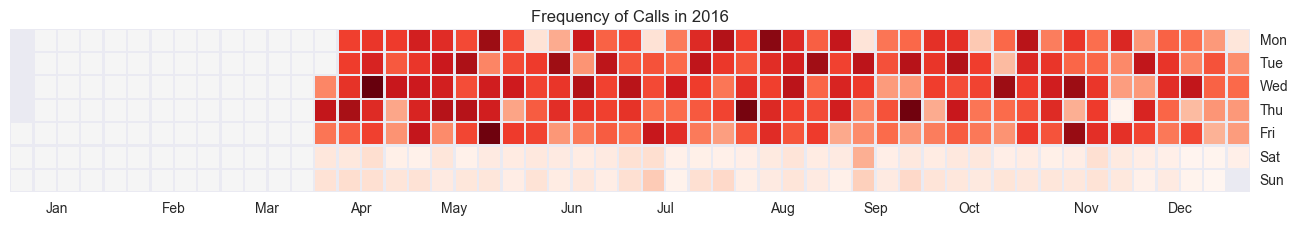

In [45]:
plt.figure(figsize=(16, 12))
calmap.yearplot(frequency_of_calls, year = 2016)
plt.title("Frequency of Calls in 2016")


### HeatMap of frequency of dates 2016

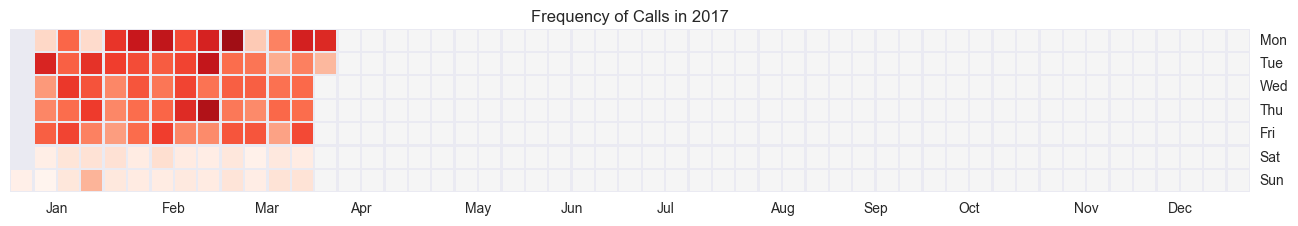

In [46]:
plt.figure(figsize=(16, 12))
calmap.yearplot(frequency_of_calls, year = 2017)
plt.title("Frequency of Calls in 2017")

### It seemes that people either do not do this type of request on wekeends or 311 does not recieve this type on weekends

### Pretty much al year long there is this type of request

_______

_______

# Pothole datase

In [47]:
pothole.head()

CREATION DATE     STATUS COMPLETION DATE SERVICE REQUEST NUMBER  \
0    03/30/2016  Completed      03/30/2016            16-02136778   
1    03/30/2016  Completed      03/30/2016            16-02136786   
2    03/30/2016  Completed      03/30/2016            16-02136792   
3    03/30/2016  Completed      03/30/2016            16-02136806   
4    03/30/2016  Completed      03/30/2016            16-02136808   

  TYPE OF SERVICE REQUEST CURRENT ACTIVITY MOST RECENT ACTION  \
0       Pothole in Street    Final Outcome    Pothole Patched   
1       Pothole in Street    Final Outcome    Pothole Patched   
2       Pothole in Street    Final Outcome    Pothole Patched   
3       Pothole in Street    Final Outcome    Pothole Patched   
4       Pothole in Street    Final Outcome    Pothole Patched   

   NUMBER OF POTHOLES FILLED ON BLOCK         STREET ADDRESS      ZIP  \
0                                16.0      3845 N CICERO AVE  60641.0   
1                                 4.0         6900 W 59TH ST  60638.0   
2                                17.0       5799 W BARRY AVE  60634.0   
3                                10.0         4400 W 64TH ST  60629.0   
4                                 6.0  5800 W WELLINGTON AVE  60634.0   

   X COORDINATE  Y COORDINATE  Ward  Police District  Community Area   SSA  \
0  1.143679e+06  1.925230e+06  45.0             17.0            15.0  28.0   
1  1.131414e+06  1.864639e+06  13.0              8.0            56.0   NaN   
2  1.137171e+06  1.920020e+06  30.0             25.0            19.0   NaN   
3  1.148141e+06  1.861801e+06  13.0              8.0            65.0   3.0   
4  1.137193e+06  1.919355e+06  30.0             25.0            19.0   NaN   

    LATITUDE  LONGITUDE                                  LOCATION  
0  41.951123 -87.747105   (41.95112319391782, -87.74710499089163)  
1  41.784925 -87.793795   (41.78492500153787, -87.79379537096702)  
2  41.936578 -87.771230  (41.936577655865015, -87.77123040208077)  
3  41.776831 -87.732540   (41.77683109261358, -87.73253986688879)  
4  41.934970 -87.771294   (41.93496999710197, -87.77129444716077)

#### checkout very quickly columns and data before importation

In [48]:
!cd data && head -n 2 pothole.csv

CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,Community Area,SSA,LATITUDE,LONGITUDE,LOCATION
03/30/2016,Completed,03/30/2016,16-02136778,Pothole in Street,Final Outcome,Pothole Patched,16,3845 N CICERO AVE,60641,1143679.22201736,1925230.24367508,45,17,15,28,41.95112319391782,-87.74710499089163,"(41.95112319391782, -87.74710499089163)"


In [49]:
pothole.dtypes

CREATION DATE                          object
STATUS                                 object
COMPLETION DATE                        object
SERVICE REQUEST NUMBER                 object
TYPE OF SERVICE REQUEST                object
CURRENT ACTIVITY                       object
MOST RECENT ACTION                     object
NUMBER OF POTHOLES FILLED ON BLOCK    float64
STREET ADDRESS                         object
ZIP                                   float64
X COORDINATE                          float64
Y COORDINATE                          float64
Ward                                  float64
Police District                       float64
Community Area                        float64
SSA                                   float64
LATITUDE                              float64
LONGITUDE                             float64
LOCATION                               object
dtype: object

In [50]:
pothole.shape

(55595, 19)

### Let's throw out na's

In [51]:
pothole = pothole.dropna(subset =['LATITUDE'])

In [52]:
pothole = pothole.dropna(subset=['LONGITUDE'])

In [53]:
pothole.shape

(55463, 19)

### Change  values and type of columns

In [54]:
pothole['location-tuple'] = list(zip(pothole.LATITUDE, pothole.LONGITUDE))

In [55]:
float64= pothole.dtypes[pothole.dtypes == "float64"].index
for i in float64:
    pothole[i] = pothole[i].astype(str)

new_zip = np.array([zipcode[0:5] for zipcode in pothole['ZIP']])
pothole['ZIP'] = new_zip

object_type= pothole.dtypes[pothole.dtypes == "object"].index
for i in object_type:
    pothole[i] = pothole[i].astype("category")    
    
pothole.dtypes

CREATION DATE                         category
STATUS                                category
COMPLETION DATE                       category
SERVICE REQUEST NUMBER                category
TYPE OF SERVICE REQUEST               category
CURRENT ACTIVITY                      category
MOST RECENT ACTION                    category
NUMBER OF POTHOLES FILLED ON BLOCK    category
STREET ADDRESS                        category
ZIP                                   category
X COORDINATE                          category
Y COORDINATE                          category
Ward                                  category
Police District                       category
Community Area                        category
SSA                                   category
LATITUDE                              category
LONGITUDE                             category
LOCATION                              category
location-tuple                        category
dtype: object

### Check range of "Creation date" of one year

In [56]:
pothole.head(1)

CREATION DATE     STATUS COMPLETION DATE SERVICE REQUEST NUMBER  \
0    03/30/2016  Completed      03/30/2016            16-02136778   

  TYPE OF SERVICE REQUEST CURRENT ACTIVITY MOST RECENT ACTION  \
0       Pothole in Street    Final Outcome    Pothole Patched   

  NUMBER OF POTHOLES FILLED ON BLOCK     STREET ADDRESS    ZIP   X COORDINATE  \
0                               16.0  3845 N CICERO AVE  60641  1143679.22202   

    Y COORDINATE  Ward Police District Community Area   SSA       LATITUDE  \
0  1925230.24368  45.0            17.0           15.0  28.0  41.9511231939   

        LONGITUDE                                 LOCATION  \
0  -87.7471049909  (41.95112319391782, -87.74710499089163)   

                    location-tuple  
0  (41.9511231939, -87.7471049909)

In [57]:
pothole.tail(1)

CREATION DATE STATUS COMPLETION DATE SERVICE REQUEST NUMBER  \
55594    03/29/2017   Open             NaN            17-01757638   

      TYPE OF SERVICE REQUEST CURRENT ACTIVITY MOST RECENT ACTION  \
55594       Pothole in Street              NaN                NaN   

      NUMBER OF POTHOLES FILLED ON BLOCK  STREET ADDRESS    ZIP  X COORDINATE  \
55594                                nan  4055 W 69TH ST  60629  1150442.3551   

        Y COORDINATE  Ward Police District Community Area  SSA       LATITUDE  \
55594  1858534.07549  13.0             8.0           65.0  3.0  41.7675952985   

            LONGITUDE                                 LOCATION  \
55594  -87.7246919258  (41.76759529849867, -87.72469192582417)   

                        location-tuple  
55594  (41.7675952985, -87.7246919258)

### List of Columns

In [58]:
list(pothole)

['CREATION DATE',
 'STATUS',
 'COMPLETION DATE',
 'SERVICE REQUEST NUMBER',
 'TYPE OF SERVICE REQUEST',
 'CURRENT ACTIVITY',
 'MOST RECENT ACTION',
 'NUMBER OF POTHOLES FILLED ON BLOCK',
 'STREET ADDRESS',
 'ZIP',
 'X COORDINATE',
 'Y COORDINATE',
 'Ward',
 'Police District',
 'Community Area',
 'SSA',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'location-tuple']

In [59]:
columns_to_erase = ['SERVICE REQUEST NUMBER','X COORDINATE','Y COORDINATE','Ward','Police District','Community Area','SSA','LATITUDE','LONGITUDE','LOCATION']

for i in columns_to_erase:
    del pothole[i]  # delete columns
pothole.head(1)

CREATION DATE     STATUS COMPLETION DATE TYPE OF SERVICE REQUEST  \
0    03/30/2016  Completed      03/30/2016       Pothole in Street   

  CURRENT ACTIVITY MOST RECENT ACTION NUMBER OF POTHOLES FILLED ON BLOCK  \
0    Final Outcome    Pothole Patched                               16.0   

      STREET ADDRESS    ZIP                   location-tuple  
0  3845 N CICERO AVE  60641  (41.9511231939, -87.7471049909)

### Description of categorical variables


In [60]:
categorical = pothole.dtypes[pothole.dtypes == "category"].index
pothole[categorical].describe()

CREATION DATE     STATUS COMPLETION DATE TYPE OF SERVICE REQUEST  \
count          55463      55463           52499                   55463   
unique           365          4             261                       1   
top       04/05/2016  Completed      06/01/2016       Pothole in Street   
freq             713      38890             596                   55463   

       CURRENT ACTIVITY MOST RECENT ACTION NUMBER OF POTHOLES FILLED ON BLOCK  \
count             38938              38911                              55463   
unique                6                 21                                176   
top       Final Outcome    Pothole Patched                                nan   
freq              38893              31913                              16484   

           STREET ADDRESS    ZIP                   location-tuple  
count               55463  55463                            55463  
unique              41698     62                            41577  
top     7900 S KEDZIE AVE  60617  (41.7497239717, -87.7025395717)  
freq                   80   2238                               80

### Let's see where are the most request zipcodes zones'

In [61]:
histo_pothole = pothole['ZIP'].value_counts()
histo_pothole.iloc[:10]

60617    2238
60643    2157
60629    2014
60628    1930
60618    1915
60619    1841
60630    1800
60620    1750
60638    1735
60634    1689
Name: ZIP, dtype: int64

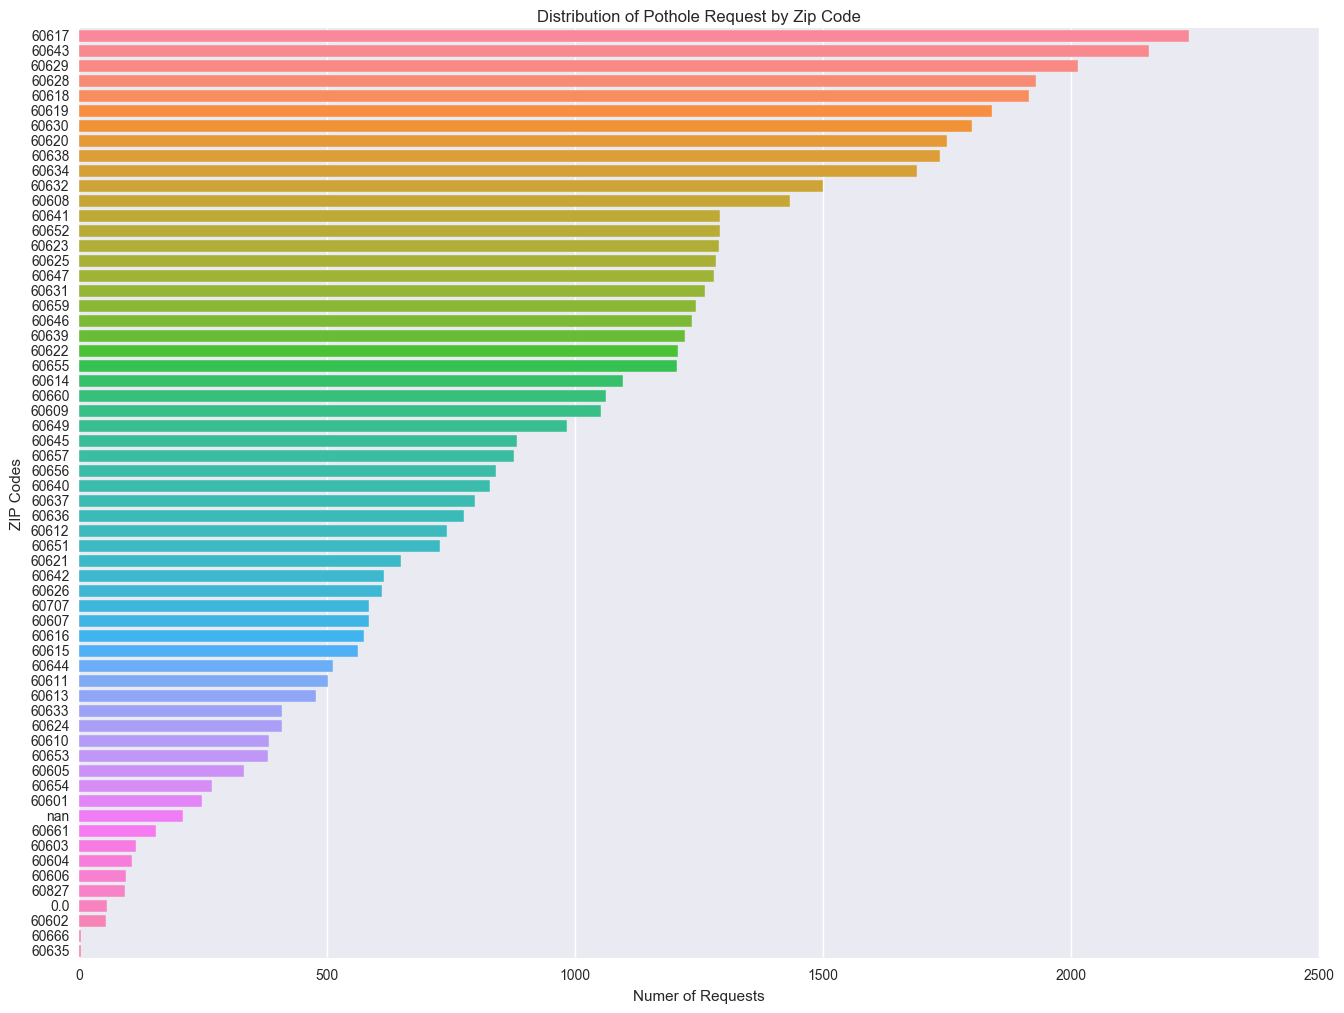

In [62]:
plt.figure(figsize=(16, 12))
g = sns.countplot(y='ZIP', saturation= 1, data=pothole, order=histo_pothole.index)
plt.title('Distribution of Pothole Request by Zip Code')
plt.xlabel('Numer of Requests')
plt.ylabel('ZIP Codes')

## Heatmap of the Pothole removal request

In [63]:
gmaps.configure(api_key=os.environ["GOOGLE_API_KEY"])

In [64]:
import gmaps.datasets

In [65]:
ubicacion_pothole = list(pothole['location-tuple'])

In [66]:
ubicacion_pothole[0]
len(ubicacion_pothole)

55463

In [67]:
m = gmaps.Map()
m.add_layer(gmaps.heatmap_layer(ubicacion_pothole))
m

# Analysis over time

In [68]:
datetime_creation = pothole['CREATION DATE']
datetime_completion = pothole['COMPLETION DATE']

In [69]:
pothole['CREATION DATE'] = pd.to_datetime(datetime_creation)
pothole['COMPLETION DATE'] = pd.to_datetime(datetime_completion)
pothole.dtypes

CREATION DATE                         datetime64[ns]
STATUS                                      category
COMPLETION DATE                       datetime64[ns]
TYPE OF SERVICE REQUEST                     category
CURRENT ACTIVITY                            category
MOST RECENT ACTION                          category
NUMBER OF POTHOLES FILLED ON BLOCK          category
STREET ADDRESS                              category
ZIP                                         category
location-tuple                              category
dtype: object

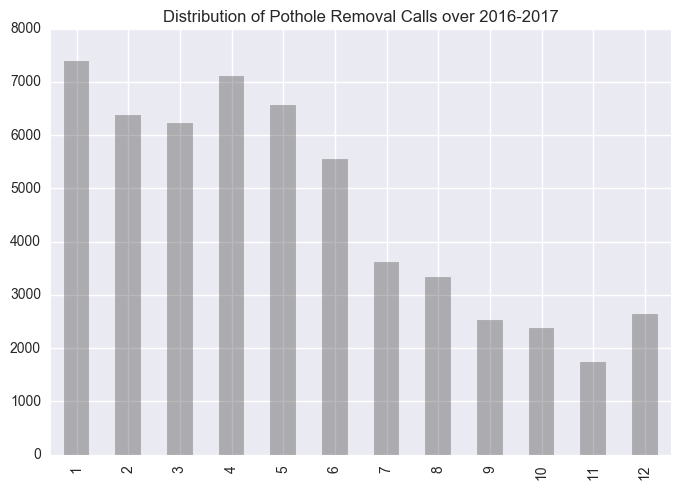

In [70]:
pothole['CREATION DATE'].dt.month.value_counts(sort=False).plot.bar(color='k', alpha=0.3)
plt.title('Distribution of Pothole Removal Calls over 2016-2017')

## Comparison between creation and completion distribution

In [71]:
for i in range(len(pothole['CREATION DATE'])):
    pothole['time_elapsed'] = pothole['COMPLETION DATE'].iloc[i] - pothole['CREATION DATE'].iloc[i]

In [72]:
pothole['COMPLETION DATE'].iloc[80] - pothole['CREATION DATE'].iloc[80]

Timedelta('1 days 00:00:00')

In [138]:
pothole.head(1)

CREATION DATE     STATUS COMPLETION DATE TYPE OF SERVICE REQUEST  \
0    2016-03-30  Completed      2016-03-30       Pothole in Street   

  CURRENT ACTIVITY MOST RECENT ACTION NUMBER OF POTHOLES FILLED ON BLOCK  \
0    Final Outcome    Pothole Patched                               16.0   

      STREET ADDRESS    ZIP                   location-tuple time_elapsed  
0  3845 N CICERO AVE  60641  (41.9511231939, -87.7471049909)          NaT

In [74]:
pothole.dtypes

CREATION DATE                         datetime64[ns]
STATUS                                      category
COMPLETION DATE                       datetime64[ns]
TYPE OF SERVICE REQUEST                     category
CURRENT ACTIVITY                            category
MOST RECENT ACTION                          category
NUMBER OF POTHOLES FILLED ON BLOCK          category
STREET ADDRESS                              category
ZIP                                         category
location-tuple                              category
time_elapsed                          datetime64[ns]
dtype: object

In [75]:
pothole['STATUS'].unique()

[Completed, Completed - Dup, Open - Dup, Open]
Categories (4, object): [Completed, Completed - Dup, Open - Dup, Open]

In [76]:
pothole.head(1)

CREATION DATE     STATUS COMPLETION DATE TYPE OF SERVICE REQUEST  \
0    2016-03-30  Completed      2016-03-30       Pothole in Street   

  CURRENT ACTIVITY MOST RECENT ACTION NUMBER OF POTHOLES FILLED ON BLOCK  \
0    Final Outcome    Pothole Patched                               16.0   

      STREET ADDRESS    ZIP                   location-tuple time_elapsed  
0  3845 N CICERO AVE  60641  (41.9511231939, -87.7471049909)          NaT

In [77]:
pothole['time_elapsed'].describe()

count     0
unique    0
Name: time_elapsed, dtype: int64

### HeatMap of frequency of dates 2016

In [78]:
#create a DateTimeIndex
dateTime = pothole.set_index(pd.DatetimeIndex(pothole['CREATION DATE']))
print(type(dateTime))
print(type(dateTime.index))

#create a frequency of calls per day
frequency_of_calls = pothole['CREATION DATE'].value_counts()
print(frequency_of_calls.iloc[:5])
print(type(frequency_of_calls))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.tseries.index.DatetimeIndex'>
2016-04-05    713
2017-01-23    559
2016-04-14    481
2017-01-24    480
2017-01-18    478
Name: CREATION DATE, dtype: int64
<class 'pandas.core.series.Series'>


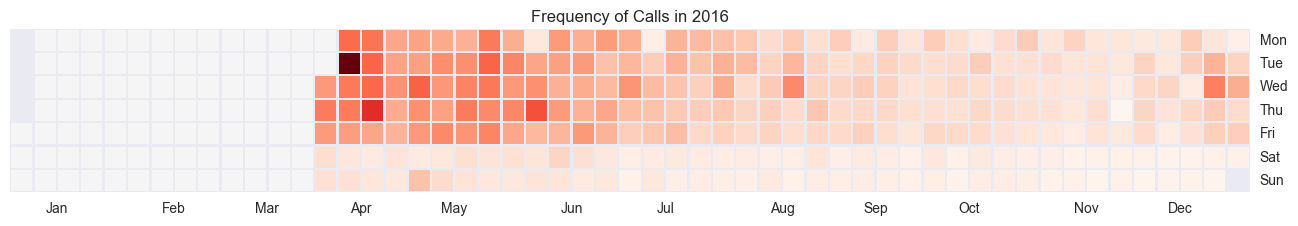

In [79]:
plt.figure(figsize=(16, 12))
calmap.yearplot(frequency_of_calls, year = 2016)
plt.title("Frequency of Calls in 2016")


### HeatMap of frequency of dates 2016

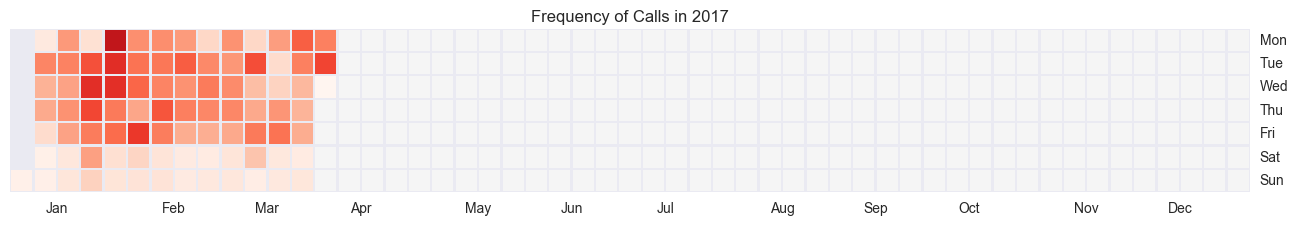

In [80]:
plt.figure(figsize=(16, 12))
calmap.yearplot(frequency_of_calls, year = 2017)
plt.title("Frequency of Calls in 2017")

______

_____

# Sanitation datase

In [81]:
sanitation.head()

Creation Date     Status Completion Date Service Request Number  \
0    03/30/2016  Completed      03/30/2016            16-02124727   
1    03/30/2016  Completed      03/30/2016            16-02127150   
2    03/30/2016  Completed      03/30/2016            16-02129247   
3    03/30/2016  Completed      03/30/2016            16-02129477   
4    03/30/2016  Completed      03/31/2016            16-02132783   

     Type of Service Request What is the Nature of this Code Violation?  \
0  Sanitation Code Violation                          Dog feces in yard   
1  Sanitation Code Violation                                      Other   
2  Sanitation Code Violation                                      Other   
3  Sanitation Code Violation                             Standing water   
4  Sanitation Code Violation                                      Other   

                        Street Address  ZIP Code  X Coordinate  Y Coordinate  \
0                       4317 W 47TH ST   60632.0  1.148281e+06  1.873116e+06   
1                      655 W WILSON DR   60640.0  1.170804e+06  1.930820e+06   
2  10300 S DR MARTIN LUTHER KING JR DR   60628.0  1.180732e+06  1.836758e+06   
3                    1961 N WILMOT AVE   60647.0  1.160411e+06  1.913012e+06   
4                   6701 W BELMONT AVE   60634.0  1.131181e+06  1.920532e+06   

   Ward  Police District  Community Area   Latitude  Longitude  \
0  14.0              8.0            57.0  41.807769 -87.731672   
1  46.0             19.0             3.0  41.965652 -87.647372   
2   9.0              5.0            49.0  41.707315 -87.613767   
3  32.0             14.0            22.0  41.917007 -87.686080   
4  36.0             25.0            18.0  41.938198 -87.793295   

                                   Location  
0    (41.8077690037055, -87.73167218108902)  
1   (41.96565225581355, -87.64737197512518)  
2   (41.70731537318311, -87.61376735728281)  
3  (41.917006787342274, -87.68607965884114)  
4    (41.93819831927812, -87.7932954964507)

#### checkout very quickly columns and data before importation

In [82]:
!cd data && head -n 2 sanitation.csv

Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,What is the Nature of this Code Violation?,Street Address,ZIP Code,X Coordinate,Y Coordinate,Ward,Police District,Community Area,Latitude,Longitude,Location
03/30/2016,Completed,03/30/2016,16-02124727,Sanitation Code Violation,Dog feces in yard,4317 W 47TH ST,60632,1148280.79012198,1873115.58757275,14,8,57,41.8077690037055,-87.73167218108902,"(41.8077690037055, -87.73167218108902)"


In [83]:
sanitation.dtypes

Creation Date                                  object
Status                                         object
Completion Date                                object
Service Request Number                         object
Type of Service Request                        object
What is the Nature of this Code Violation?     object
Street Address                                 object
ZIP Code                                      float64
X Coordinate                                  float64
Y Coordinate                                  float64
Ward                                          float64
Police District                               float64
Community Area                                float64
Latitude                                      float64
Longitude                                     float64
Location                                       object
dtype: object

In [84]:
sanitation.shape

(21444, 16)

### Let's throw out na's

In [85]:
sanitation = sanitation.dropna()

In [86]:
sanitation.shape

(20736, 16)

### Change  values and type of columns

In [87]:
sanitation['location-tuple'] = list(zip(sanitation.Latitude, sanitation.Longitude))

In [88]:
float64= sanitation.dtypes[sanitation.dtypes == "float64"].index
for i in float64:
    sanitation[i] = sanitation[i].astype(str)

new_zip = np.array([zipcode[0:5] for zipcode in sanitation['ZIP Code']])
sanitation['ZIP Code'] = new_zip

object_type= sanitation.dtypes[sanitation.dtypes == "object"].index
for i in object_type:
    sanitation[i] = sanitation[i].astype("category")    
    
sanitation.dtypes

Creation Date                                 category
Status                                        category
Completion Date                               category
Service Request Number                        category
Type of Service Request                       category
What is the Nature of this Code Violation?    category
Street Address                                category
ZIP Code                                      category
X Coordinate                                  category
Y Coordinate                                  category
Ward                                          category
Police District                               category
Community Area                                category
Latitude                                      category
Longitude                                     category
Location                                      category
location-tuple                                category
dtype: object

### Check range of "Creation date" of one year

In [89]:
sanitation.head(1)

Creation Date     Status Completion Date Service Request Number  \
0    03/30/2016  Completed      03/30/2016            16-02124727   

     Type of Service Request What is the Nature of this Code Violation?  \
0  Sanitation Code Violation                          Dog feces in yard   

   Street Address ZIP Code   X Coordinate   Y Coordinate  Ward  \
0  4317 W 47TH ST    60632  1148280.79012  1873115.58757  14.0   

  Police District Community Area       Latitude       Longitude  \
0             8.0           57.0  41.8077690037  -87.7316721811   

                                 Location                   location-tuple  
0  (41.8077690037055, -87.73167218108902)  (41.8077690037, -87.7316721811)

In [90]:
sanitation.tail(1)

Creation Date     Status Completion Date Service Request Number  \
21408    03/28/2017  Completed      03/28/2017            17-01741656   

         Type of Service Request What is the Nature of this Code Violation?  \
21408  Sanitation Code Violation                 Dumpster not being emptied   

        Street Address ZIP Code   X Coordinate  Y Coordinate  Ward  \
21408  538 W DEMING PL    60614  1172103.87813  1917235.9992  43.0   

      Police District Community Area       Latitude       Longitude  \
21408            19.0            7.0  41.9283477287  -87.6429940173   

                                       Location  \
21408  (41.928347728719494, -87.64299401732269)   

                        location-tuple  
21408  (41.9283477287, -87.6429940173)

### List of Columns

In [91]:
list(sanitation)

['Creation Date',
 'Status',
 'Completion Date',
 'Service Request Number',
 'Type of Service Request',
 'What is the Nature of this Code Violation?',
 'Street Address',
 'ZIP Code',
 'X Coordinate',
 'Y Coordinate',
 'Ward',
 'Police District',
 'Community Area',
 'Latitude',
 'Longitude',
 'Location',
 'location-tuple']

In [92]:
columns_to_erase = ['Service Request Number','X Coordinate', 'Y Coordinate','Ward','Police District','Community Area','Latitude','Longitude','Location']

for i in columns_to_erase:
    del sanitation[i]  # delete columns
sanitation.head(1)

Creation Date     Status Completion Date    Type of Service Request  \
0    03/30/2016  Completed      03/30/2016  Sanitation Code Violation   

  What is the Nature of this Code Violation?  Street Address ZIP Code  \
0                          Dog feces in yard  4317 W 47TH ST    60632   

                    location-tuple  
0  (41.8077690037, -87.7316721811)

### Description of categorical variables


In [93]:
categorical = sanitation.dtypes[sanitation.dtypes == "category"].index
sanitation[categorical].describe()

Creation Date     Status Completion Date    Type of Service Request  \
count          20736      20736           20736                      20736   
unique           364          2             322                          1   
top       06/14/2016  Completed      08/02/2016  Sanitation Code Violation   
freq             145      19871             306                      20736   

       What is the Nature of this Code Violation?    Street Address ZIP Code  \
count                                       20736             20736    20736   
unique                                          9             15649       58   
top                                         Other  4048 N MOZART ST    60632   
freq                                         8302                79     1112   

                         location-tuple  
count                             20736  
unique                            15589  
top     (41.9548460781, -87.6994914888)  
freq                                 79

### Let's see where are the most request zipcodes zones'

In [94]:
histo_sanitation = sanitation['ZIP Code'].value_counts()
histo_sanitation.iloc[:10]

60632    1112
60628     994
60620     904
60618     883
60619     859
60614     849
60647     799
60617     746
60629     656
60651     651
Name: ZIP Code, dtype: int64

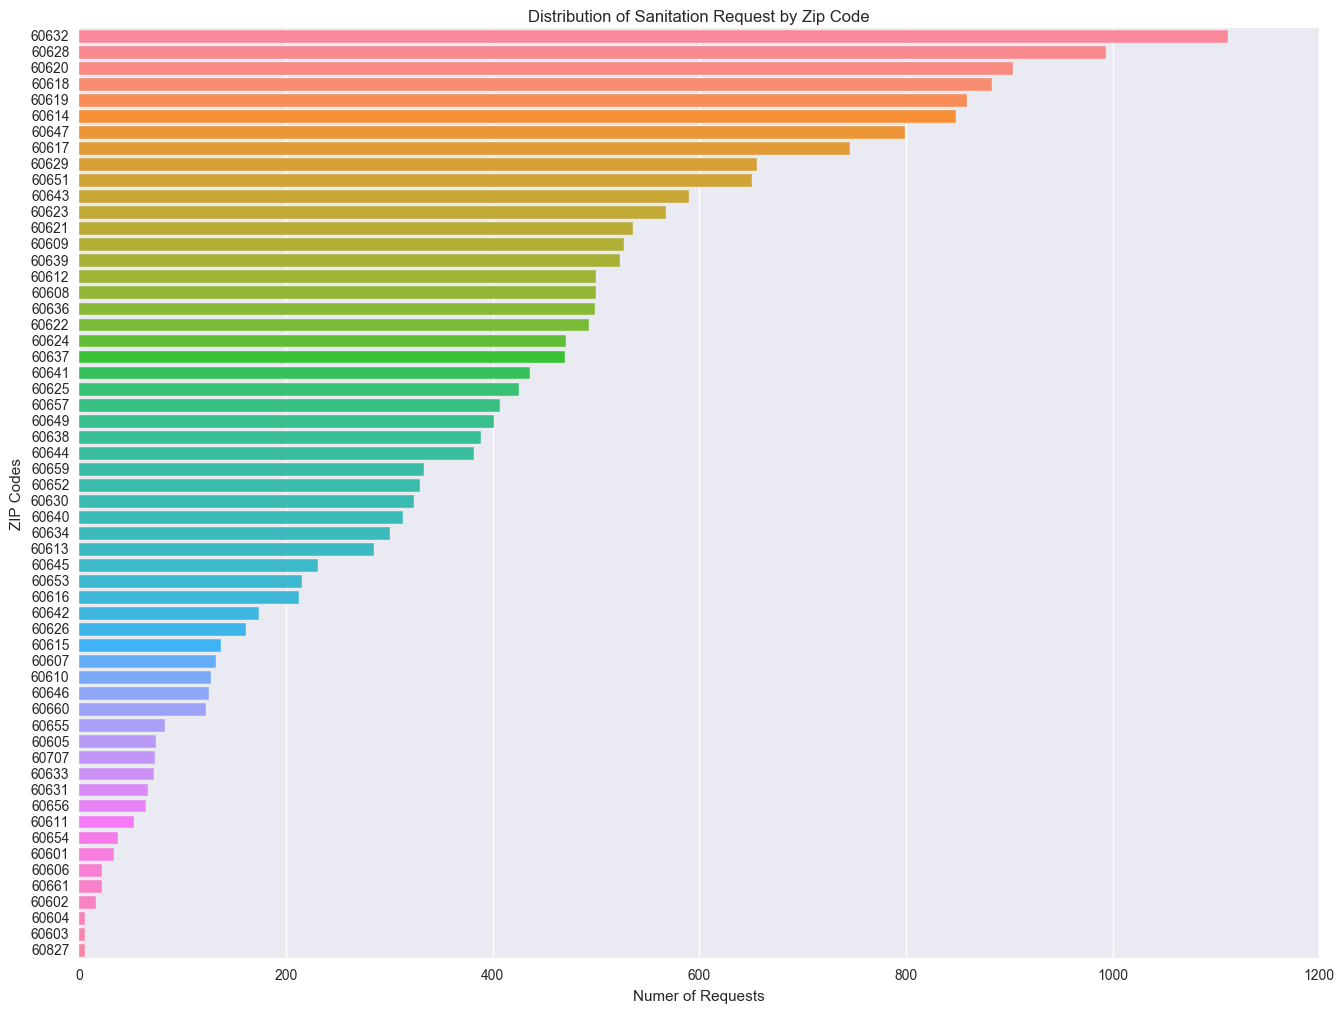

In [95]:
plt.figure(figsize=(16, 12))
g = sns.countplot(y='ZIP Code', saturation= 1, data=sanitation, order=histo_sanitation.index)
plt.title('Distribution of Sanitation Request by Zip Code')
plt.xlabel('Numer of Requests')
plt.ylabel('ZIP Codes')

## What type of saniation request are more demanded?

In [96]:
histo_place = sanitation['What is the Nature of this Code Violation?'].value_counts()
histo_place.iloc[:10]

Other                                  8302
Garbage in yard                        3849
Garbage in alley                       3068
Overflowing carts                      1597
Dumpster not being emptied             1527
Dog feces in yard                      1175
Construction Site Cleanliness/Fence     876
Standing water                          313
Graffiti Commercial Vehicle              29
Name: What is the Nature of this Code Violation?, dtype: int64

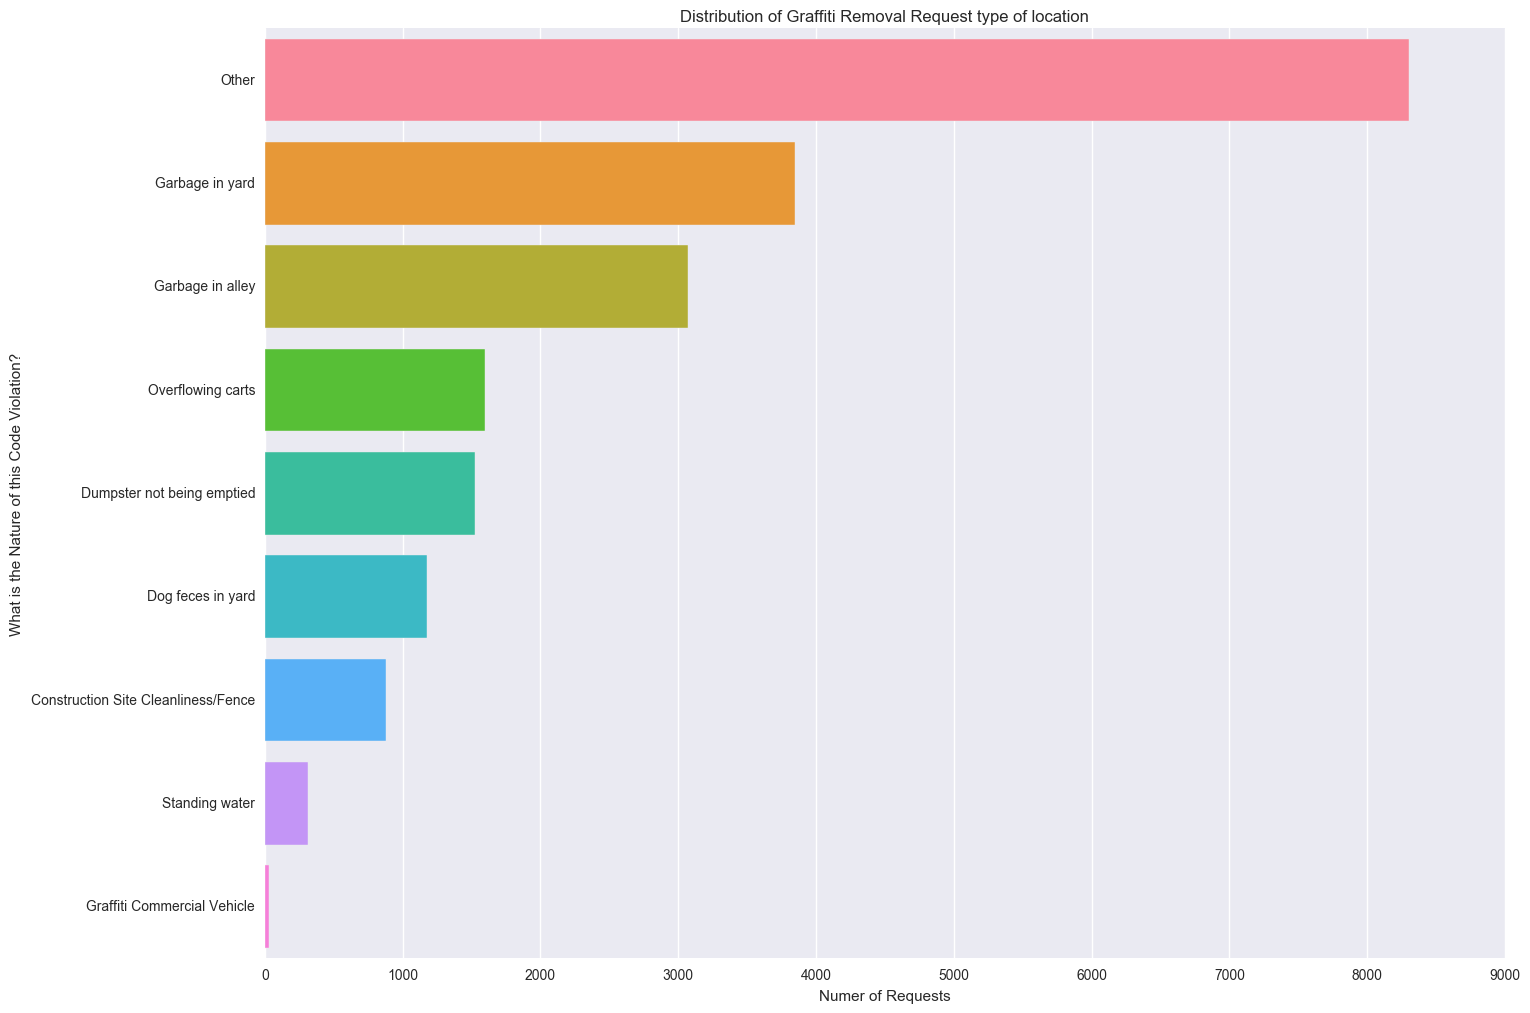

In [97]:
plt.figure(figsize=(16, 12))
g = sns.countplot(y='What is the Nature of this Code Violation?', saturation= 1, data=sanitation, order=histo_place.index)
plt.title('Distribution of Graffiti Removal Request type of location')
plt.xlabel('Numer of Requests')

## Heatmap of the Sanitation removal request

In [98]:
gmaps.configure(api_key=os.environ["GOOGLE_API_KEY"])

In [99]:
ubicacion_sanitation = list(sanitation['location-tuple'])
ubicacion_sanitation[0]

(41.807769003705502, -87.731672181089024)

In [100]:
m = gmaps.Map()
m.add_layer(gmaps.heatmap_layer(ubicacion_sanitation))
m

# Analysis over time

In [101]:
datetime_creation = sanitation['Creation Date']
datetime_completion = sanitation['Completion Date']

In [102]:
sanitation['Creation Date'] = pd.to_datetime(datetime_creation)
sanitation['Completion Date'] = pd.to_datetime(datetime_completion)

In [103]:
sanitation.dtypes

Creation Date                                 datetime64[ns]
Status                                              category
Completion Date                               datetime64[ns]
Type of Service Request                             category
What is the Nature of this Code Violation?          category
Street Address                                      category
ZIP Code                                            category
location-tuple                                      category
dtype: object

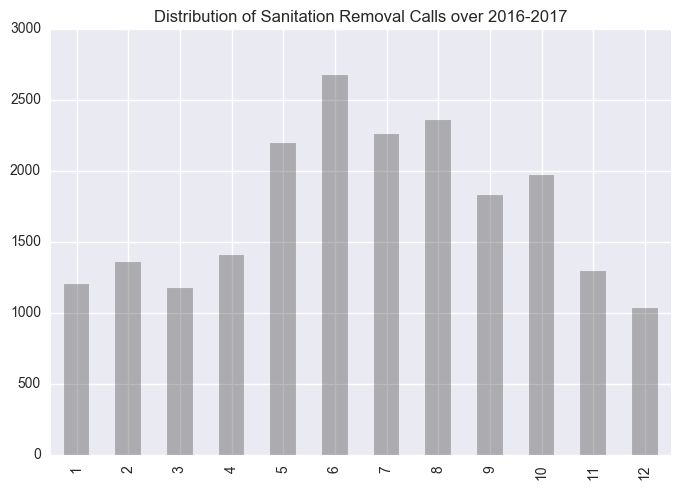

In [104]:
sanitation['Creation Date'].dt.month.value_counts(sort=False).plot.bar(color='k', alpha=0.3)
plt.title('Distribution of Sanitation Removal Calls over 2016-2017')

## Comparison between creation and completion distribution

In [105]:
for i in range(len(sanitation['Creation Date'])):
    sanitation['time_elapsed'] = sanitation['Completion Date'].iloc[i]- sanitation['Creation Date'].iloc[i]

In [106]:
sanitation.head(1)

Creation Date     Status Completion Date    Type of Service Request  \
0    2016-03-30  Completed      2016-03-30  Sanitation Code Violation   

  What is the Nature of this Code Violation?  Street Address ZIP Code  \
0                          Dog feces in yard  4317 W 47TH ST    60632   

                    location-tuple  time_elapsed  
0  (41.8077690037, -87.7316721811)        0 days

In [107]:
sanitation['time_elapsed'].describe()

count              20736
mean     0 days 00:00:00
std      0 days 00:00:00
min      0 days 00:00:00
25%      0 days 00:00:00
50%      0 days 00:00:00
75%      0 days 00:00:00
max      0 days 00:00:00
Name: time_elapsed, dtype: object

## Building Heatmaps of date's frequency

In [108]:
#create a DateTimeIndex
dateTime = sanitation.set_index(pd.DatetimeIndex(sanitation['Creation Date']))
print(type(dateTime))
print(type(dateTime.index))

#create a frequency of calls per day
frequency_of_calls = sanitation['Creation Date'].value_counts()
print(frequency_of_calls.iloc[:5])
print(type(frequency_of_calls))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.tseries.index.DatetimeIndex'>
2016-06-14    145
2016-08-01    133
2016-08-02    131
2016-10-18    130
2016-07-05    128
Name: Creation Date, dtype: int64
<class 'pandas.core.series.Series'>


### HeatMap of frequency of dates 2016

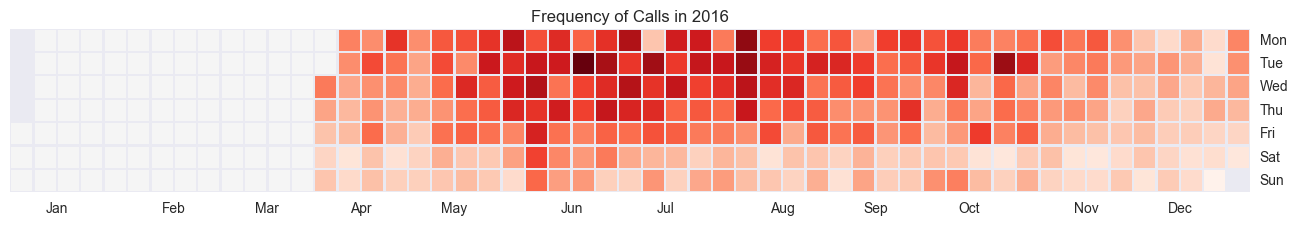

In [109]:
plt.figure(figsize=(16, 12))
calmap.yearplot(frequency_of_calls, year = 2016)
plt.title("Frequency of Calls in 2016")


### HeatMap of frequency of dates 2016

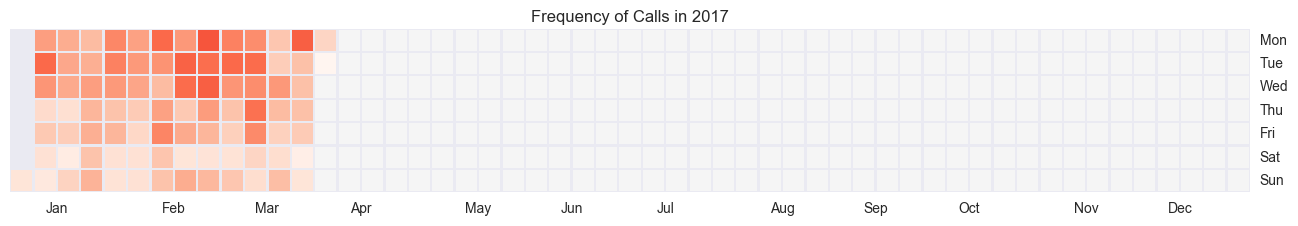

In [110]:
plt.figure(figsize=(16, 12))
calmap.yearplot(frequency_of_calls, year = 2017)
plt.title("Frequency of Calls in 2017")

_______

____

# Vacant datase

In [111]:
vacant = pd.read_csv('/Users/schzcas/Documents/github/machine-learning-public-policy/diagnostic/data/vacant.csv')


In [112]:
vacant.head(2)

SERVICE REQUEST TYPE SERVICE REQUEST NUMBER  \
0  Vacant/Abandoned Building            16-02126660   
1  Vacant/Abandoned Building            16-02132723   

  DATE SERVICE REQUEST WAS RECEIVED  \
0                        03/30/2016   
1                        03/30/2016   

  LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).  \
0                                              Front                      
1                                               Rear                      

   IS THE BUILDING DANGEROUS OR HAZARDOUS? IS BUILDING OPEN OR BOARDED?  \
0                                      NaN                         Open   
1                                      NaN                         Open   

  IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?  \
0                                         FRONT DOOR   
1                                               REAR   

  IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?  \
0                                        Vacant   
1                                        Vacant   

  IS THE BUILDING VACANT DUE TO FIRE?  \
0                               False   
1                               False   

  ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)  \
0                                               True      
1                                              False      

                    ...                     ADDRESS STREET SUFFIX ZIP CODE  \
0                   ...                                        ST  60609.0   
1                   ...                                        ST  60617.0   

   X COORDINATE  Y COORDINATE  Ward  Police District  Community Area  \
0  1.167570e+06  1.869478e+06  20.0              9.0            61.0   
1  1.190998e+06  1.841035e+06   7.0              4.0            51.0   

    LATITUDE  LONGITUDE                                 Location  
0  41.797394 -87.661029    (41.7973939805301, -87.6610292301867)  
1  41.718810 -87.576032  (41.71881025864325, -87.57603247957272)  

[2 rows x 23 columns]

In [113]:
vacant.dtypes

SERVICE REQUEST TYPE                                                      object
SERVICE REQUEST NUMBER                                                    object
DATE SERVICE REQUEST WAS RECEIVED                                         object
LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).     object
IS THE BUILDING DANGEROUS OR HAZARDOUS?                                  float64
IS BUILDING OPEN OR BOARDED?                                              object
IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?                        object
IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?                             object
IS THE BUILDING VACANT DUE TO FIRE?                                       object
ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)                     object
ADDRESS STREET NUMBER                                                      int64
ADDRESS STREET DIRECTION                                                  object
ADDRESS STREET NAME         

In [114]:
vacant.shape

(4756, 23)

### Let's throw out na's

In [115]:
vacant = vacant.dropna(subset =['LATITUDE'])

In [116]:
vacant = vacant.dropna(subset=['LONGITUDE'])

In [117]:
vacant.shape

(4754, 23)

### Change  values and type of columns

In [118]:
vacant['location-tuple'] = list(zip(vacant.LATITUDE, vacant.LONGITUDE))

In [119]:
float64= vacant.dtypes[vacant.dtypes == "float64"].index
for i in float64:
    vacant[i] = vacant[i].astype(str)

new_zip = np.array([zipcode[0:5] for zipcode in vacant['ZIP CODE']])
vacant['ZIP CODE'] = new_zip

object_type= vacant.dtypes[vacant.dtypes == "object"].index
for i in object_type:
    vacant[i] = vacant[i].astype("category")    
    
vacant.dtypes

SERVICE REQUEST TYPE                                                     category
SERVICE REQUEST NUMBER                                                   category
DATE SERVICE REQUEST WAS RECEIVED                                        category
LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).    category
IS THE BUILDING DANGEROUS OR HAZARDOUS?                                  category
IS BUILDING OPEN OR BOARDED?                                             category
IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?                       category
IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?                            category
IS THE BUILDING VACANT DUE TO FIRE?                                      category
ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)                    category
ADDRESS STREET NUMBER                                                       int64
ADDRESS STREET DIRECTION                                                 category
ADDRESS STREET N

### Check range of "Creation date" of one year

In [120]:
vacant.head(1)

SERVICE REQUEST TYPE SERVICE REQUEST NUMBER  \
0  Vacant/Abandoned Building            16-02126660   

  DATE SERVICE REQUEST WAS RECEIVED  \
0                        03/30/2016   

  LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).  \
0                                              Front                      

  IS THE BUILDING DANGEROUS OR HAZARDOUS? IS BUILDING OPEN OR BOARDED?  \
0                                     nan                         Open   

  IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?  \
0                                         FRONT DOOR   

  IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?  \
0                                        Vacant   

  IS THE BUILDING VACANT DUE TO FIRE?  \
0                               False   

  ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)  \
0                                               True      

                ...                 ZIP CODE   X COORDINATE   Y COORDINATE  \
0               ...                    60609  1167569.83317  1869477.73331   

   Ward Police District Community Area       LATITUDE       LONGITUDE  \
0  20.0             9.0           61.0  41.7973939805  -87.6610292302   

                                Location                   location-tuple  
0  (41.7973939805301, -87.6610292301867)  (41.7973939805, -87.6610292302)  

[1 rows x 24 columns]

In [121]:
vacant.tail(1)

SERVICE REQUEST TYPE SERVICE REQUEST NUMBER  \
4755  Vacant/Abandoned Building            17-01749291   

     DATE SERVICE REQUEST WAS RECEIVED  \
4755                        03/28/2017   

     LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).  \
4755                                              Front                      

     IS THE BUILDING DANGEROUS OR HAZARDOUS? IS BUILDING OPEN OR BOARDED?  \
4755                                     nan                         Open   

     IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?  \
4755                                                NaN   

     IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?  \
4755                                        Vacant   

     IS THE BUILDING VACANT DUE TO FIRE?  \
4755                               False   

     ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)  \
4755                                              False      

                   ...                 ZIP CODE   X COORDINATE   Y COORDINATE  \
4755               ...                    60636  1164635.48001  1867828.84802   

      Ward Police District Community Area       LATITUDE       LONGITUDE  \
4755  15.0             7.0           67.0  41.7929317084  -87.6718364599   

                                     Location                   location-tuple  
4755  (41.79293170844507, -87.67183645991896)  (41.7929317084, -87.6718364599)  

[1 rows x 24 columns]

### Description of categorical variables


In [122]:
categorical = vacant.dtypes[vacant.dtypes == "category"].index
vacant[categorical].describe()

SERVICE REQUEST TYPE SERVICE REQUEST NUMBER  \
count                        4754                   4754   
unique                          1                   4754   
top     Vacant/Abandoned Building            17-01749291   
freq                         4754                      1   

       DATE SERVICE REQUEST WAS RECEIVED  \
count                               4754   
unique                               361   
top                           05/17/2016   
freq                                  79   

       LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).  \
count                                                4079                      
unique                                                  3                      
top                                                 Front                      
freq                                                 3213                      

       IS THE BUILDING DANGEROUS OR HAZARDOUS? IS BUILDING OPEN OR BOARDED?  \
count                                     4754                         4086   
unique                                       1                            2   
top                                        nan                         Open   
freq                                      4754                         3317   

       IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?  \
count                                                2331   
unique                                                764   
top                                                 FRONT   
freq                                                  320   

       IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?  \
count                                           4087   
unique                                             2   
top                                           Vacant   
freq                                            4024   

       IS THE BUILDING VACANT DUE TO FIRE?  \
count                                 4077   
unique                                   2   
top                                  False   
freq                                  3693   

       ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)  \
count                                                4085      
unique                                                  2      
top                                                 False      
freq                                                 2466      

                     ...                ZIP CODE   X COORDINATE  \
count                ...                    4754           4754   
unique               ...                      51           4062   
top                  ...                   60636  1181669.35618   
freq                 ...                     535              5   

         Y COORDINATE  Ward Police District Community Area       LATITUDE  \
count            4754  4754            4754           4754           4754   
unique           4062    51              24             77           4063   
top     1877306.96991  16.0             7.0           67.0  41.8187015097   
freq                5   436             837            474              5   

             LONGITUDE                                 Location  \
count             4754                                     4754   
unique            4063                                     4063   
top     -87.6095356666  (41.81870150971542, -87.63126243420638)   
freq                 5                                        5   

                         location-tuple  
count                              4754  
unique                             4063  
top     (41.8187015097, -87.6312624342)  
freq                                  5  

[4 rows x 23 columns]

In [123]:
columns_to_erase = ['SERVICE REQUEST TYPE','SERVICE REQUEST NUMBER','X COORDINATE','Y COORDINATE','Ward','Police District','Community Area','LATITUDE','LONGITUDE','Location']

for i in columns_to_erase:
    del vacant[i]  # delete columns
vacant.head(1)

DATE SERVICE REQUEST WAS RECEIVED  \
0                        03/30/2016   

  LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).  \
0                                              Front                      

  IS THE BUILDING DANGEROUS OR HAZARDOUS? IS BUILDING OPEN OR BOARDED?  \
0                                     nan                         Open   

  IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?  \
0                                         FRONT DOOR   

  IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?  \
0                                        Vacant   

  IS THE BUILDING VACANT DUE TO FIRE?  \
0                               False   

  ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)  \
0                                               True      

   ADDRESS STREET NUMBER ADDRESS STREET DIRECTION ADDRESS STREET NAME  \
0                   5318                        S              BISHOP   

  ADDRESS STREET SUFFIX ZIP CODE                   location-tuple  
0                    ST    60609  (41.7973939805, -87.6610292302)

## Heatmap of the vacant removal request

In [124]:
gmaps.configure(api_key=os.environ["GOOGLE_API_KEY"])

In [125]:
import gmaps.datasets

In [126]:
ubicacion_vacant = list(vacant['location-tuple'])

In [127]:
ubicacion_vacant[0]

(41.797393980530103, -87.661029230186713)

In [128]:
import math
ubicacion_vacant = [t for t in ubicacion_vacant if not any(isinstance(n, float) and math.isnan(n) for n in t)]

In [129]:
len(ubicacion_vacant)

4754

In [130]:
m = gmaps.Map()
m.add_layer(gmaps.heatmap_layer(ubicacion_vacant))
m

# Analysis over time

In [131]:
datetime_column = vacant['DATE SERVICE REQUEST WAS RECEIVED']

In [132]:
vacant['DATE SERVICE REQUEST WAS RECEIVED'] = pd.to_datetime(datetime_column)
vacant['DATE SERVICE REQUEST WAS RECEIVED'].dtypes

vacant.head()

DATE SERVICE REQUEST WAS RECEIVED  \
0                        2016-03-30   
1                        2016-03-30   
2                        2016-03-30   
3                        2016-03-30   
4                        2016-03-30   

  LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).  \
0                                              Front                      
1                                               Rear                      
2                                              Front                      
3                                              Front                      
4                                               Rear                      

  IS THE BUILDING DANGEROUS OR HAZARDOUS? IS BUILDING OPEN OR BOARDED?  \
0                                     nan                         Open   
1                                     nan                         Open   
2                                     nan                      Boarded   
3                                     nan                      Boarded   
4                                     nan                         Open   

  IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?  \
0                                         FRONT DOOR   
1                                               REAR   
2  UPPER WINDOWS AND SHINGLES BLOWING OFF FRONT O...   
3                                                NaN   
4                                                NaN   

  IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?  \
0                                        Vacant   
1                                        Vacant   
2                                        Vacant   
3                                        Vacant   
4                                        Vacant   

  IS THE BUILDING VACANT DUE TO FIRE?  \
0                               False   
1                               False   
2                               False   
3                               False   
4                                True   

  ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)  \
0                                               True      
1                                              False      
2                                              False      
3                                              False      
4                                               True      

   ADDRESS STREET NUMBER ADDRESS STREET DIRECTION ADDRESS STREET NAME  \
0                   5318                        S              BISHOP   
1                   1957                        E                97TH   
2                   8156                        S             KENWOOD   
3                   8200                        S          DORCHESTER   
4                   4609                        S              HONORE   

  ADDRESS STREET SUFFIX ZIP CODE                   location-tuple  
0                    ST    60609  (41.7973939805, -87.6610292302)  
1                    ST    60617  (41.7188102586, -87.5760324796)  
2                   AVE    60619   (41.7467435077, -87.591727723)  
3                   AVE    60619  (41.7459661585, -87.5904931524)  
4                    ST    60609     (41.8102018599, -87.6710912)

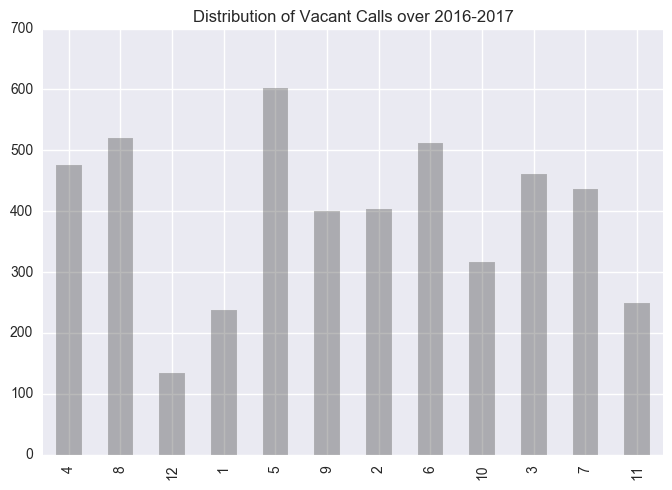

In [133]:
vacant['DATE SERVICE REQUEST WAS RECEIVED'].dt.month.value_counts(sort=False).plot.bar(color='k', alpha=0.3)
plt.title('Distribution of Vacant Calls over 2016-2017')

In [134]:
#create a DateTimeIndex
dateTime = vacant.set_index(pd.DatetimeIndex(vacant['DATE SERVICE REQUEST WAS RECEIVED']))
print(type(dateTime))
print(type(dateTime.index))

#create a frequency of calls per day
frequency_of_calls = vacant['DATE SERVICE REQUEST WAS RECEIVED'].value_counts()
print(frequency_of_calls.iloc[:5])
print(type(frequency_of_calls))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.tseries.index.DatetimeIndex'>
2016-05-17    79
2016-04-05    48
2016-08-18    48
2016-05-25    36
2017-02-07    35
Name: DATE SERVICE REQUEST WAS RECEIVED, dtype: int64
<class 'pandas.core.series.Series'>


### HeatMap of frequency of dates 2016

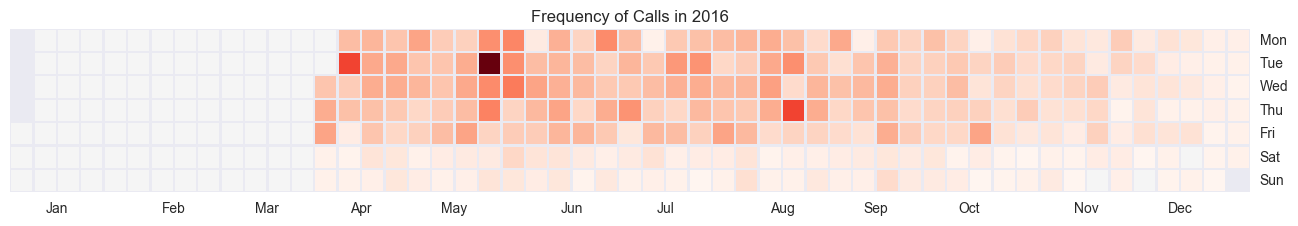

In [135]:
plt.figure(figsize=(16, 12))
calmap.yearplot(frequency_of_calls, year = 2016)
plt.title("Frequency of Calls in 2016")


### HeatMap of frequency of dates 2016

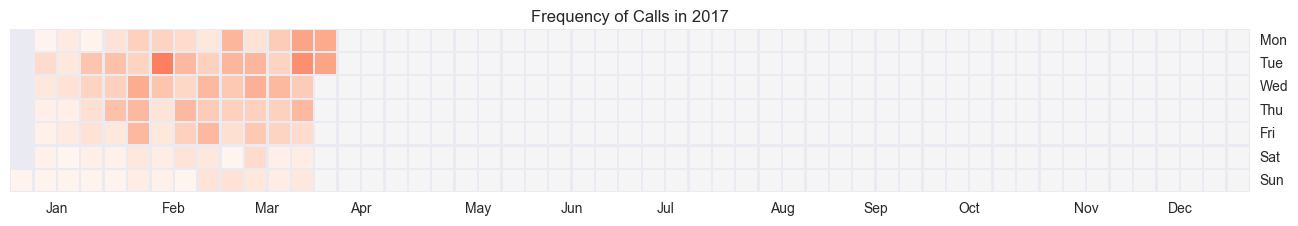

In [136]:
plt.figure(figsize=(16, 12))
calmap.yearplot(frequency_of_calls, year = 2017)
plt.title("Frequency of Calls in 2017")

# General map

In [137]:
m = gmaps.Map()
m.add_layer(gmaps.heatmap_layer(ubicacion_graffiti))
m.add_layer(gmaps.heatmap_layer(ubicacion_sanitation))
m.add_layer(gmaps.heatmap_layer(ubicacion_pothole))
m

______